In [3]:
import pandas as pd
import numpy as np

In [4]:
import chardet
with open(r"C:\Users\LENOVO\Downloads\sms_spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [5]:
df= pd.read_csv(r"C:\Users\LENOVO\Downloads\sms_spam.csv",encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


* Data Cleaning

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
# encoding the label ham:0, spam:1
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.sample(2)

,target,text
3643,0,* Thought I didn't see you.
2144,1,FreeMsg: Hey - I'm Buffy. 25 and love to satis...


In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
#remove duplicate
df.drop_duplicates(keep='first',inplace= True)
df.duplicated().sum()

0

* EDA

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

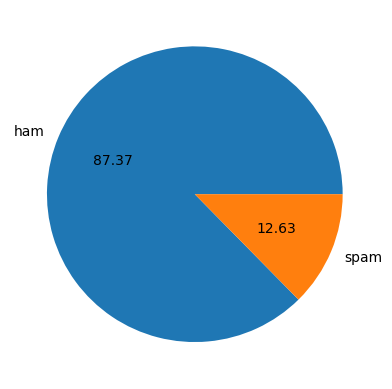

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [14]:
# data is imbalanced

In [15]:
# checking how many chars, sentences, and words are in message
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# no. of characters
df['num_char']=df['text'].apply(len)
# no. of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# no. of sentences
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df[['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
#ham
df[df['target']==0][['num_char','num_words','num_sen']].describe()


,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
#spam
df[df['target']==1][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


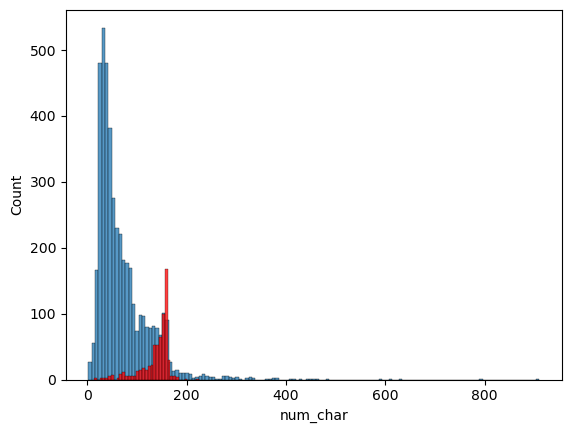

In [20]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


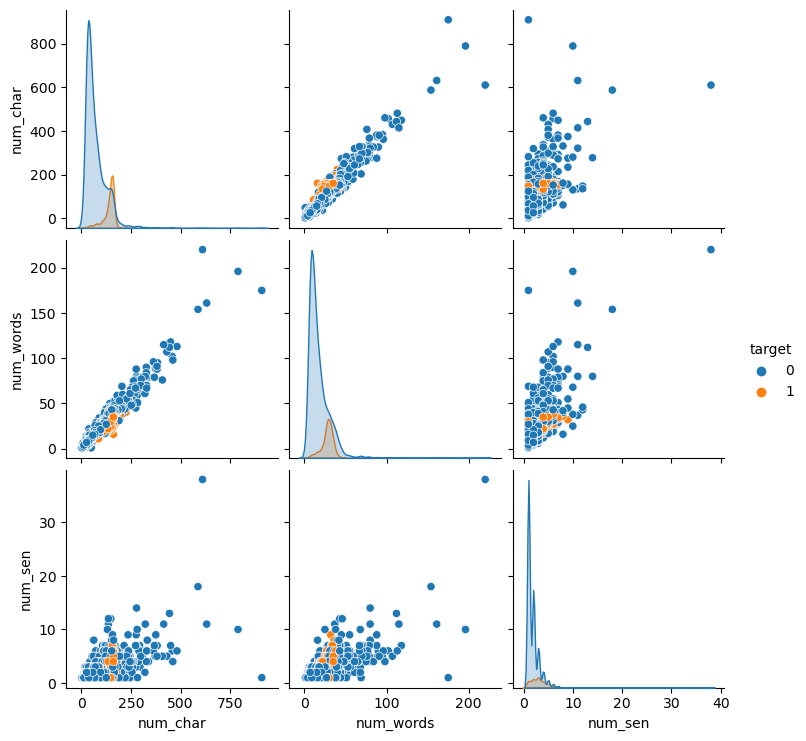

In [21]:
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

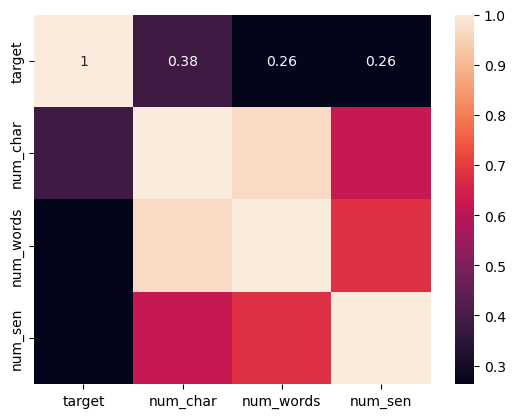

In [22]:
sns.heatmap(df[['target','num_char','num_words','num_sen']].corr(),annot=True)

* Text Preprocessing

In [23]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))       
    return ' '.join(y)

In [24]:
transform_text("I love eating @ panipuri with you!! .I am loving the way you prepare it.")

'love eat panipuri love way prepar'

In [25]:
df['transformed_text']=df['text'].apply(transform_text)

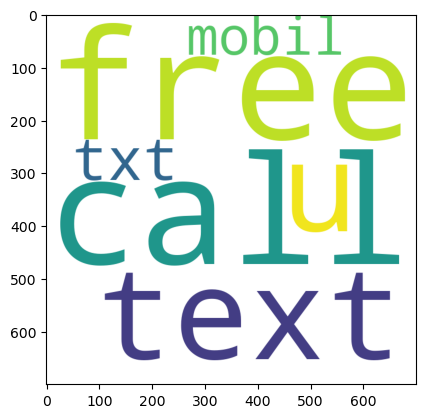

In [26]:
from wordcloud import WordCloud
wc= WordCloud(width=700, height=700, min_font_size=100, background_color='white')
spam_wc= wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)
plt.show()

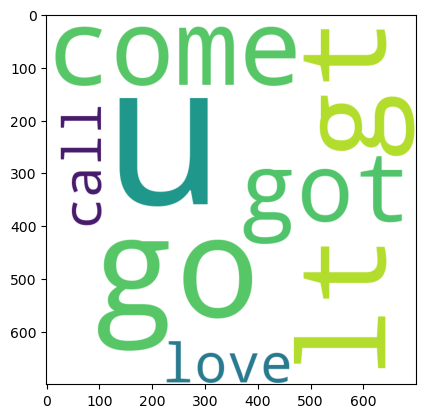

In [27]:
ham_wc= wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [28]:
# most common 30 words in spam messages
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

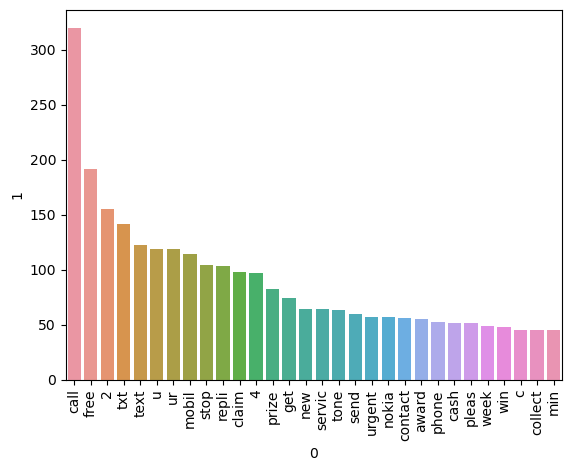

In [29]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [30]:
# most common 30 words in ham messages
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

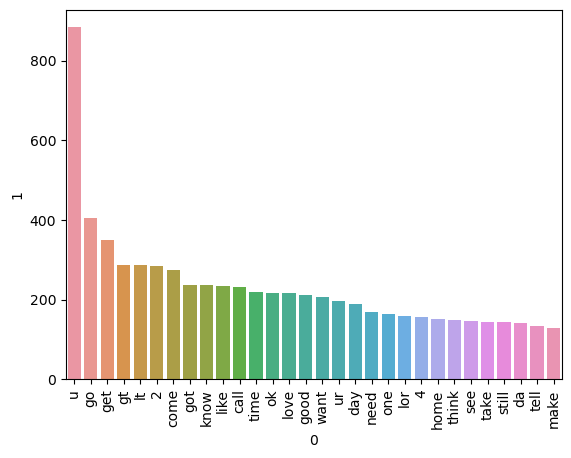

In [31]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

* Model Building

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf= TfidfVectorizer()
cv= CountVectorizer()
x=tf.fit_transform(df['transformed_text']).toarray()
y= df['target'].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [34]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
gnb= GaussianNB()
bnb= BernoulliNB()
mnb= MultinomialNB()

In [35]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print('GNB')
print('accuracy_score is : ',accuracy_score(y_test,y_pred1))
print('confusion_matrix is : ',confusion_matrix(y_test,y_pred1))
print('precision_score is : ',precision_score(y_test,y_pred1))

bnb.fit(x_train,y_train)
y_pred2= bnb.predict(x_test)
print('BNB')
print('accuracy_score is : ',accuracy_score(y_test,y_pred2))
print('confusion_matrix is : ',confusion_matrix(y_test,y_pred2))
print('precision_score is : ',precision_score(y_test,y_pred2))

mnb.fit(x_train,y_train)
y_pred3= mnb.predict(x_test)
print('MNB')
print('accuracy_score is : ',accuracy_score(y_test,y_pred3))
print('confusion_matrix is : ',confusion_matrix(y_test,y_pred3))
print('precision_score is : ',precision_score(y_test,y_pred3))

GNB
accuracy_score is :  0.8762088974854932
confusion_matrix is :  [[793 103]
 [ 25 113]]
precision_score is :  0.5231481481481481
BNB
accuracy_score is :  0.9700193423597679
confusion_matrix is :  [[893   3]
 [ 28 110]]
precision_score is :  0.9734513274336283
MNB
accuracy_score is :  0.9593810444874274
confusion_matrix is :  [[896   0]
 [ 42  96]]
precision_score is :  1.0


In [36]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [37]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [108]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [109]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc,  'LR': lrc,  'RF': rfc,  
        'AdaBoost': abc, 'BgC': bc, 'ETC': etc,'GBDT':gbdt,}


In [110]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [111]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [112]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.935203,0.838095


In [113]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [115]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539
